# Start-Up Ecosystem Resources - Exploratory Data Analysis
This notebook performs an exploratory data analysis of a global startup funding dataset. The main goal is to understand various aspects of venture capital, including funding trends, industry distribution, the relationship between company size and funding, and regional funding patterns.

This notebook was created by Hilary Nicole and is available as the first of four notebooks that are published under the `Capital, Careers, and Complex Systems: Gendered Pathways to Venture Funding and Entrepreneurial Outcomes` repository available on [GitHub](https://github.com/hxe00570)



## Key Findings:
**Data Overview:** The dataset contains 2000 entries with information on startup name, industry, country, funding stage, amount raised, funding date, and number of employees. It covers a period from 2016 to 2026.
European Context: Approximately 732 observations in the dataset are identified as European, based on a predefined list of European countries.

**Funding and Organizational Size:** The scatter plot shows a log–log relationship between employee count and funding raised, consistent with a power‑law pattern in venture data, where a few companies attract outsized funding and larger teams tend to raise more.

**Market Interaction:** The analysis reveals the top 10 industries by deal count and compares funding maturity (amount raised by funding stage) between European and global hubs. This helps understand sectoral focus and regional funding disparities.

**Global Capital Distribution:** The faceted choropleth map visually represents how capital is distributed across different countries for various funding stages, providing a geographical perspective on venture capital concentration.

**Data Quality:** The descriptive statistics and info confirm that the dataset is well-structured with no immediate missing values in key columns after initial processing, and data types are appropriate for analysis.

##Code:

Each code block is preceded by a markdown cell explaining what the code block does.

Install necessary Python libraries: `kagglehub`, `seaborn`, and `matplotlib` for data loading, visualization, and manipulation.

In [46]:
!pip install -q kagglehub[pandas-datasets] seaborn matplotlib

Import all the required Python libraries for the analysis, including `kagglehub` for dataset access, `pandas` for data manipulation, `seaborn` and `matplotlib.pyplot` for static plotting, `os` for operating system interaction, and `plotly`.express for interactive plotting.

In [47]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px

Define the `path` variable to facilitate downloading raw data

In [48]:
# Defines path variable for easy load
path = kagglehub.dataset_download("nudratabbas/global-startup-funding-and-vc-trends-20152026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-startup-funding-and-vc-trends-20152026' dataset.
Path to dataset files: /kaggle/input/global-startup-funding-and-vc-trends-20152026


Loads the `startup_funding_dataset (1).csv` file into a `pandas` DataFrame named `df`. Then print the number of rows loaded and display the first 5 rows of the DataFrame to give an initial glimpse of the data.

In [49]:
# Load the primary CSV file
# Note: Ensure the filename matches the 'startup_funding_dataset (1).csv' or similar in the folder
csv_path = os.path.join(path, "startup_funding_dataset (1).csv")
df = pd.read_csv(csv_path)

print(f"Successfully loaded dataframe with {df.shape[0]} rows.")
df.head()

Successfully loaded dataframe with 2000 rows.


,Startup Name,Industry,Country,Funding Stage,Amount Raised (USD),Funding Date,Number of Employees
0,"Williamson, Greer and Clark",SaaS,Australia,Seed,304706.0,2016-07-03,386
1,"Bradford, Green and Miranda",Finance,India,IPO,641212096.0,2025-08-10,474
2,Kelly LLC,AI,UK,Series A,4149256.0,2024-11-13,220
3,Riggs-Wells,Health,France,IPO,940259054.0,2018-10-03,14
4,"Walters, Edwards and Welch",E-commerce,France,Seed,419487.0,2021-12-27,137


Provide a concise summary of the DataFrame, including the column names, their non-null counts, data types, and memory usage. This helps to understand the structure and completeness of the dataset.

In [50]:
# Display a concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Startup Name         2000 non-null   object 
 1   Industry             2000 non-null   object 
 2   Country              2000 non-null   object 
 3   Funding Stage        2000 non-null   object 
 4   Amount Raised (USD)  2000 non-null   float64
 5   Funding Date         2000 non-null   object 
 6   Number of Employees  2000 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB


Rename columns in the DataFrame to more concise and consistent names (e.g., 'Amount Raised (USD)' to 'amount_usd'). This step improves readability and ease of use for subsequent analysis. It then prints the updated column names and displays the first 5 rows with the new names.

In [51]:
# RENAME COLUMNS FOR SHORTER SYNTAX
# Mapping long dataset names
rename_map = {
    'Startup Name': 'startup_name',
    'Industry': 'industry',
    'Country': 'country',
    'Funding Stage': 'funding_stage',
    'Amount Raised (USD)': 'amount_usd',
    'Funding Date': 'funding_date',
    'Number of Employees': 'num_employees'
}

df.rename(columns=rename_map, inplace=True)

print("Updated Columns:", df.columns.tolist())
print("\nFirst 5 rows with updated columns:")
display(df.head())

Updated Columns: ['startup_name', 'industry', 'country', 'funding_stage', 'amount_usd', 'funding_date', 'num_employees']

First 5 rows with updated columns:


,startup_name,industry,country,funding_stage,amount_usd,funding_date,num_employees
0,"Williamson, Greer and Clark",SaaS,Australia,Seed,304706.0,2016-07-03,386
1,"Bradford, Green and Miranda",Finance,India,IPO,641212096.0,2025-08-10,474
2,Kelly LLC,AI,UK,Series A,4149256.0,2024-11-13,220
3,Riggs-Wells,Health,France,IPO,940259054.0,2018-10-03,14
4,"Walters, Edwards and Welch",E-commerce,France,Seed,419487.0,2021-12-27,137


Display descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns in the DataFrame, providing a quick statistical summary of the data.

In [52]:
# Display descriptive statistics for numerical columns
display(df.describe())

,amount_usd,num_employees
count,2.000000e+03,2000.000000
mean,1.492196e+08,254.213500
std,2.431539e+08,142.842392
min,5.041300e+04,5.000000
25%,3.938574e+06,130.750000
50%,3.246517e+07,257.000000
75%,1.657782e+08,379.000000
max,9.999670e+08,500.000000


Generate a scatter plot to explore the relationship between the number of employees and the amount raised (amount_usd) by all firms in the sample. Both axes are set to a logarithmic scale, which is crucial for visualizing venture funding data due to its often skewed distribution. Different funding stages are highlighted with distinct colors.

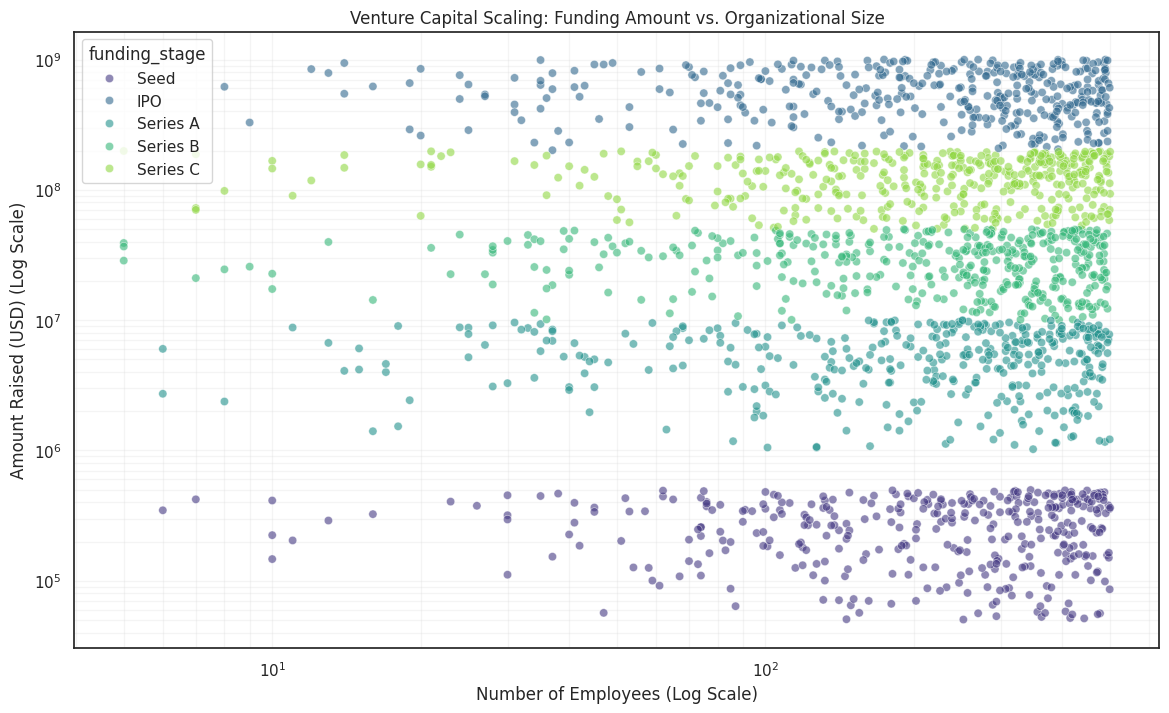

In [53]:
# EXPLORATORY ANALYSIS: RESOURCE DISTRIBUTION
plt.figure(figsize=(14, 8))
sns.set_theme(style="white")

# Examining the relationship between company size and funding amount
sns.scatterplot(data=df, x='num_employees', y='amount_usd',
                hue='funding_stage', alpha=0.6, palette='viridis')

plt.yscale('log') # Vital for venture data
plt.xscale('log') # Log-Log scales help identify power-law distributions in complex systems
plt.title('Venture Capital Scaling: Funding Amount vs. Organizational Size')
plt.xlabel('Number of Employees (Log Scale)')
plt.ylabel('Amount Raised (USD) (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

Prep data for conversion transforming `funding_date` column to a datetime object. Then extract the year and create a boolean `is_europe` flag to identify European countries based on a short list of EU member countries and EEA countries. Then print the range of years covered and the total count of European observations.

In [54]:
# TEMPORAL AND REGIONAL DATA PREPARATION
# Convert funding_date to datetime for longitudinal analysis
df['funding_date'] = pd.to_datetime(df['funding_date'])
df['year'] = df['funding_date'].dt.year

# Create a 'region' flag for European context (Alignment with CBS)
european_hubs = [
 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czechia'
 , 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland'
 , 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands'
 , 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']
df['is_europe'] = df['country'].isin(european_hubs)

print(f"Dataset covers years {df['year'].min()} to {df['year'].max()}.")
print(f"Total European observations: {df['is_europe'].sum()}")



Dataset covers years 2016 to 2026.
Total European observations: 732


Plot funding overtime for EU and EEA countries

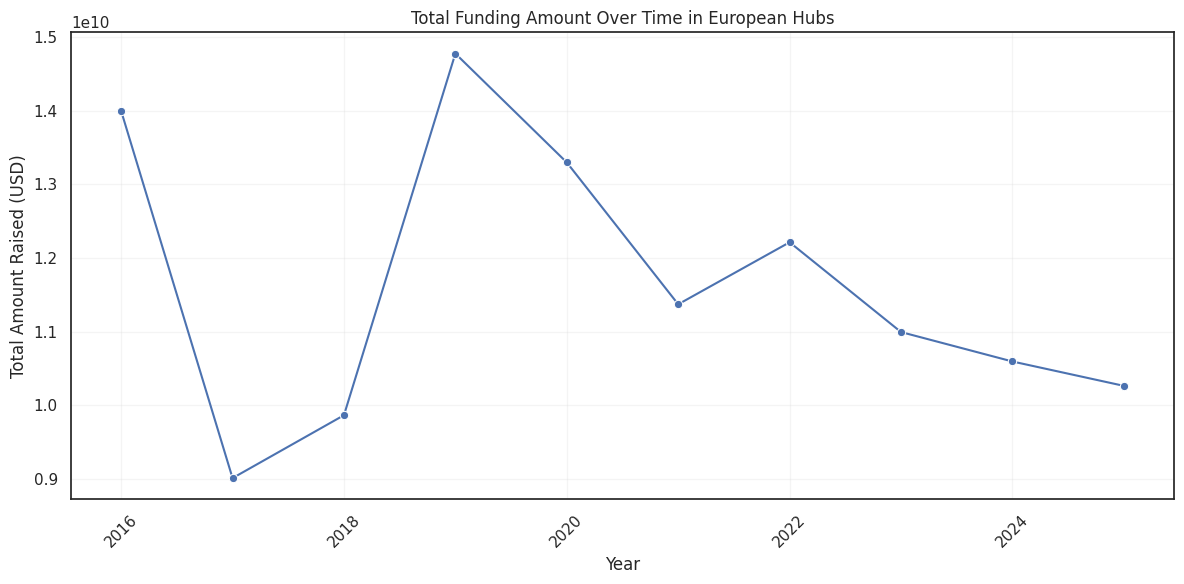

In [55]:
# Filter the DataFrame for European countries
df_europe = df[df['is_europe'] == True]

# Group by year and sum the amount raised for European countries
europe_funding_trend = df_europe.groupby('year')['amount_usd'].sum().reset_index()

# Plotting the funding trend for European countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=europe_funding_trend, x='year', y='amount_usd', marker='o')
plt.title('Total Funding Amount Over Time in European Hubs')
plt.xlabel('Year')
plt.ylabel('Total Amount Raised (USD)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Look at EU and EEA countries individually over time

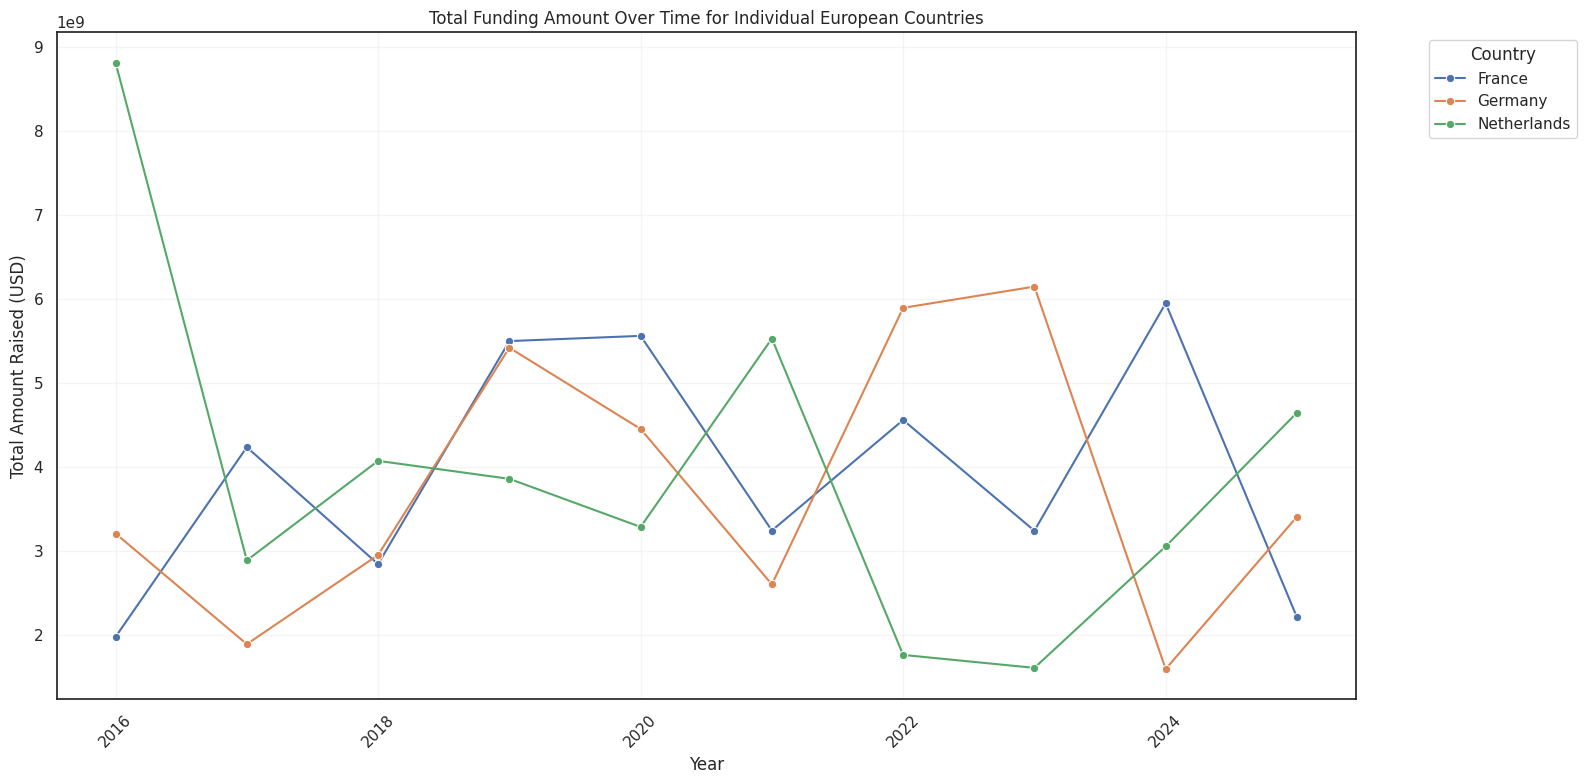

In [56]:
# Filter the DataFrame for European countries (df_europe already created)
# Group by year and country, and sum the amount raised
europe_country_funding_trend = df_europe.groupby(['year', 'country'])['amount_usd'].sum().reset_index()

# Plotting the funding trend for each European country
plt.figure(figsize=(16, 8))
sns.lineplot(data=europe_country_funding_trend, x='year', y='amount_usd', hue='country', marker='o')
plt.title('Total Funding Amount Over Time for Individual European Countries')
plt.xlabel('Year')
plt.ylabel('Total Amount Raised (USD)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Create two subplots to analyze market interaction. The first subplot is a horizontal bar chart showing the top 10 industries by the count of deals for all countries. The second subplot is a box plot comparing the distribution of funding amounts across different funding stages, differentiating between European and global startups.

/tmp/ipython-input-461915455.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



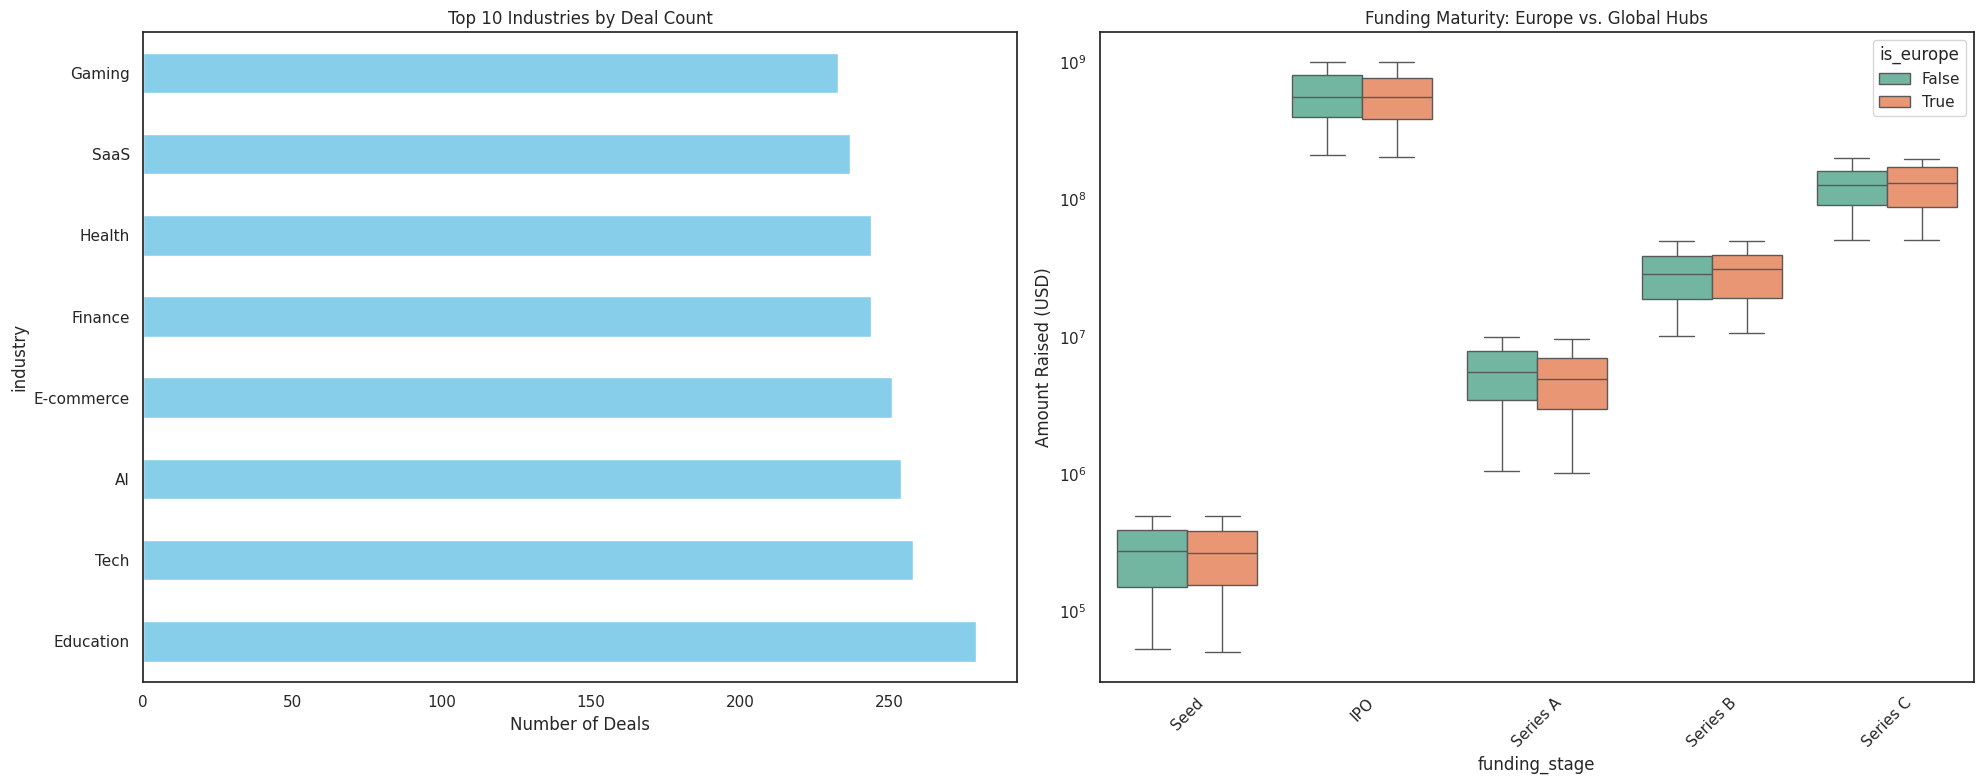

In [57]:
# MARKET INTERACTION: SECTORAL AND REGIONAL ANALYSIS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Industry Distribution
df['industry'].value_counts().head(10).plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Industries by Deal Count')
ax1.set_xlabel('Number of Deals')

# Funding by Stage in Europe vs Global
sns.boxplot(data=df, x='funding_stage', y='amount_usd', hue='is_europe',
            ax=ax2, palette='Set2')
ax2.set_yscale('log')
ax2.set_title('Funding Maturity: Europe vs. Global Hubs')
ax2.set_ylabel('Amount Raised (USD)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Create two new subplots to analyze market interaction in European countries. The first subplot is a horizontal bar chart showing the top 10 industries by the count of deals for EU/EAA countries in dataset. The second subplot is a box plot comparing the distribution of funding amounts across different funding stages, differentiating between these countries.

/tmp/ipython-input-426708530.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



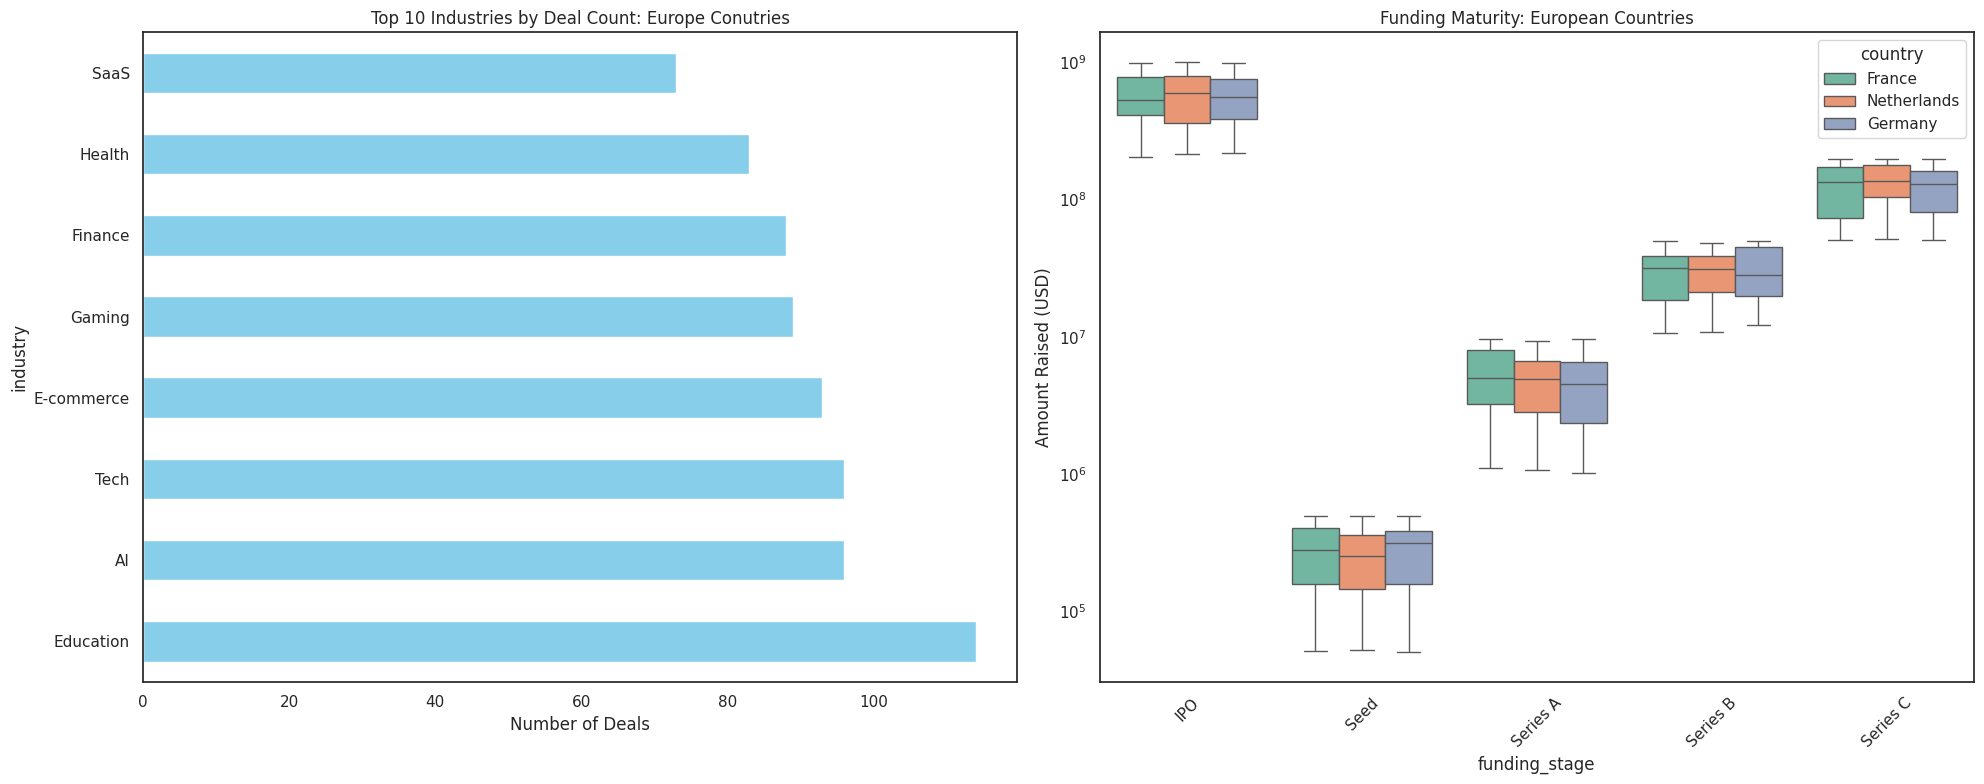

In [58]:
# MARKET INTERACTION: SECTORAL AND EU/EEA ONLY ANALYSIS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Industry Distribution
df_europe['industry'].value_counts().head(10).plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Industries by Deal Count: Europe Conutries')
ax1.set_xlabel('Number of Deals')

# Funding by Stage in Europe vs Global
sns.boxplot(data=df_europe, x='funding_stage', y='amount_usd', hue='country',
            ax=ax2, palette='Set2')
ax2.set_yscale('log')
ax2.set_title('Funding Maturity: European Countries')
ax2.set_ylabel('Amount Raised (USD)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Generate a faceted choropleth map using `plotly.express` then aggregate total funding per country per funding stage and generate separate maps for each funding stage, showing the geographical concentration of venture capital. This interactive visualization allows for detailed exploration of funding landscapes.

In [59]:
# FACETED CHOROPLETH: CAPITAL DISTRIBUTION BY STAGE
# Aggregate the data to get total funding per country per stage
map_data = df.groupby(['country', 'funding_stage'])['amount_usd'].sum().reset_index()

fig = px.choropleth(
    map_data,
    locations="country",
    locationmode='country names',
    color="amount_usd",
    hover_name="country",
    facet_col="funding_stage", # This creates the separate maps
    facet_col_wrap=2,          # Wraps the maps into a grid
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Global Venture Capital Concentration by Funding Stage",
    labels={'amount_usd': 'Total Funding (USD)'}
)

fig.update_layout(
    height=800,
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Capital (USD)")
)

fig.show()